## En este notebook vamos ver cómo aplicar los diferentes algoritmos de clustering a la data de iris

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Esta dataset se podía cargar directamente de scikit, dentro del módulo datasets

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
#Cargo los datos
data = load_iris()

In [ ]:
#Defino la matriz de features
X = data.data

In [ ]:
#Defino el vector de targets
y = data.target

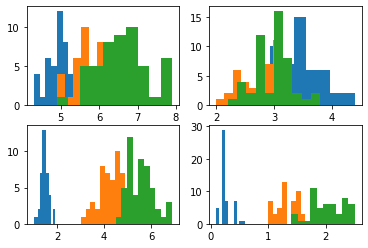

In [ ]:
#Miro la distribución de las clases para cada variable mediante histogramas

fig, axs= plt.subplots(nrows=2, ncols=2)
axs = axs.flatten()

for i in range(X.shape[1]):
    
    axs[i].hist(X[y==0,i])
    axs[i].hist(X[y==1,i])
    axs[i].hist(X[y==2,i])

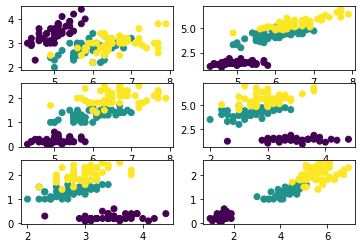

In [ ]:
# También usando scatter plots
fig, axs= plt.subplots(nrows=3, ncols=2)
axs = axs.flatten()

axs[0].scatter(X[:,0],X[:,1], c = y)
axs[1].scatter(X[:,0],X[:,2], c = y)
axs[2].scatter(X[:,0],X[:,3], c = y)
axs[3].scatter(X[:,1],X[:,2], c = y)
axs[4].scatter(X[:,1],X[:,3], c = y)
axs[5].scatter(X[:,2],X[:,3], c = y)

Vamos a estandarizar los datos, puesto que lo vamos a necesitar para hacer el kmeans (dado que todas las variables tienen que ser del mismo rango)


In [ ]:
from sklearn import preprocessing

ss = preprocessing.StandardScaler()

X_scaled = pd.DataFrame( ss.fit_transform(X), columns = data.feature_names)

Probamos diferentes algoritmos de clustering y vemos su rendimiento en la reconstrucción de los tres grupos

In [ ]:
from sklearn.cluster import KMeans

nclusters = 3

km = KMeans(n_clusters=nclusters, random_state=0, n_init=100)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters, n_init = 100, random_state=100)
gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3,compute_full_tree=True)
y_cluster_agg = agg.fit_predict(X_scaled)
y_cluster_agg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import completeness_score
print(completeness_score(y, y_cluster_kmeans))
print(completeness_score(y, y_cluster_gmm))
print(completeness_score(y, y_cluster_agg))

0.6598476779627759
0.9010648908640206
0.6940248415952218


In [ ]:
from sklearn.metrics import adjusted_mutual_info_score
print(adjusted_mutual_info_score(y, y_cluster_kmeans))
print(adjusted_mutual_info_score(y, y_cluster_gmm))
print(adjusted_mutual_info_score(y, y_cluster_agg))

0.6552228479234871
0.89843610336763
0.6712861348071291


Veamos el número de clusters usando el método elbow. En este caso, podemos llamar al atributo *inertia_* de kmeans después de fittearlo. Dicho atributo nos devuelve la suma del cuadrado de las distancias a los centroides, que es lo que optimiza kmeans. Para más info, podéis ver la documentación de kmeans en scikit http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

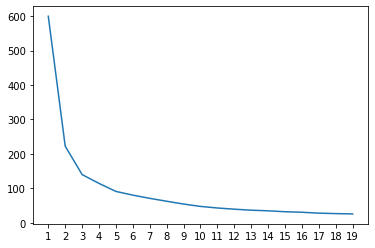

In [ ]:
kmeans_scores = []
for k in np.arange(1,20):
    km = KMeans(n_clusters=k, random_state=0, n_init=100)
    km.fit(X_scaled)
    kmeans_scores.append(km.inertia_)

plt.plot(np.arange(1,20), kmeans_scores)
plt.xticks(np.arange(1,20))
pass